### Magnitude Plots

In this notebook, I create some related to the magnitude distribution of our sample, that will be used in Appendix B.

In [1]:
#Import stuff
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
#import seaborn as sns
rcParams['font.family'] = 'serif'

# Adjust rc parameters to make plots pretty
def plot_pretty(dpi=200, fontsize=8):
    
    import matplotlib.pyplot as plt

    plt.rc("savefig", dpi=dpi)       # dpi resolution of saved image files
    # if you have LaTeX installed on your laptop, uncomment the line below for prettier labels
    plt.rc('text', usetex=True)      # use LaTeX to process labels
    plt.rc('font', size=fontsize)    # fontsize
    plt.rc('xtick', direction='in')  # make axes ticks point inward
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=10) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=10) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [0.5, 1.1]) # fix dotted lines

    return

plot_pretty()

Function that creates jointplots

In [2]:
from matplotlib import gridspec
from scipy.stats import gaussian_kde

def jointPlot(data_1, data_2, dims,cols,bins,kde=False,**kwargs):
    '''
    data = our dataset - dimensions (:,2) or (:,4) depending on the dimension
    dims = 2 or 4 - 2 in case we have a joint plot of one type of data - 4 if we have two types of data
    cols = colors (1 or 2)
    '''
    # ============================================================
    # ============================================================
    # Define the max and mins of the first dataset
    x_min_1, x_max_1 = data_1[:,0].min(),data_1[:,0].max()
    y_min_1, y_max_1 = data_1[:,1].min(),data_1[:,1].max()
    
    # Now if dims = 4, find the min and max of the second dataset as well
    if (dims==4):
        x_min_2, x_max_2 = data_2[:,0].min(),data_2[:,0].max()
        y_min_2, y_max_2 = data_2[:,1].min(),data_2[:,1].max()
    
    # ============================================================
    # ============================================================
    # Define grid for subplots
    gs = gridspec.GridSpec(2, 2,wspace=0.2,hspace=0.2, width_ratios=[4, 1], height_ratios = [1, 4])
    
    # ============================================================
    # ============================================================
    #Create scatter plot
    fig = plt.figure(figsize=(5.5,5.5),facecolor='white')
    ax = plt.subplot(gs[1, 0],frameon = True)
    cax = ax.scatter(data_1[:,0], data_1[:,1],rasterized=True, color=cols[0], s=0.7, alpha=.6)
    # Now in case dims=4, add one more scatter plot
    if (dims==4):
        cax = ax.scatter(data_2[:,0], data_2[:,1], rasterized=True,color=cols[1], s=0.7, alpha=.7)
   
    ax.grid(ls='--', axis='both' ,alpha=0.6)
    
    ax.set_xlabel(kwargs['xlabel'],fontsize=13)
    ax.set_ylabel(kwargs['ylabel'],fontsize=13)
    # ===============================================================
    # ===============================================================
    # Lower and upper limits in the x and y directions
    x_low = kwargs['xlow']
    x_up = kwargs['xup']
    y_low = kwargs['ylow']
    y_up = kwargs['yup']
    # ===============================================================
    # ===============================================================
    #Create Y-marginal (right)
    axr = plt.subplot(gs[1, 1], sharey=ax, frameon = True, xticks = [],ylim=(y_low,y_up)) 
    axr.hist(data_1[:,1],bins=bins, color = cols[0],alpha=0.6, orientation = 'horizontal', normed = True)
    # In case dims = 4, add one more historgram
    if (dims==4):
        axr.hist(data_2[:,1],bins=bins, color = cols[1],alpha=0.7, orientation = 'horizontal', normed = True)
        
    
    axr.grid(ls='--', axis='both' ,alpha=0.6)
    
    
    # ===============================================================
    #Create X-marginal(top)
    axt = plt.subplot(gs[0,0], sharex=ax,frameon = True, yticks=[],xlim=(x_low,x_up))
    axt.hist(data_1[:,0],bins=bins, color = cols[0],alpha=0.6, normed = True)
    # In case dims = 4, add one more histogram
    if (dims==4):
        axt.hist(data_2[:,0],bins=bins, color = cols[1],alpha=0.7, normed = True)
        
    axt.grid(ls='--', axis='both' ,alpha=0.6)
    
    #Bring the marginals closer to the scatter plot
    fig.tight_layout(pad = 0.0)

    if kde:
        kdex_1=gaussian_kde(data_1[:,0])
        kdey_1=gaussian_kde(data_1[:,1])
        x_1= np.linspace(x_min_1,x_max_1,100)
        y_1= np.linspace(y_min_1,y_max_1,100)
        dx_1=kdex_1(x_1)
        dy_1=kdey_1(y_1)
        axr.plot(dy_1,y_1,color='grey',linewidth=1)
        axt.plot(x_1,dx_1,color='gray', linewidth=1)
        
        # And in case dims = 4, we have more kdes
        if (dims==4):
            kdex_2=gaussian_kde(data_2[:,0])
            kdey_2=gaussian_kde(data_2[:,1])
            x_2= np.linspace(x_min_2,x_max_2,100)
            y_2= np.linspace(y_min_2,y_max_2,100)
            dx_2=kdex_2(x_2)
            dy_2=kdey_2(y_2)
            axr.plot(dy_2,y_2,color='grey', ls='--', linewidth=1)
            axt.plot(x_2,dx_2,color='grey', ls='--', linewidth=1)
        
    return ax,axt,axr
    

#### Import the catalog with the Galfit results now

In [3]:
from astropy.io import fits
#Galfit_res = fits.open('y3_gold_2_2_lsbg_galfit_v3.2.fits')
Galfit_res = fits.open('Galfit_final_IDs.fits')
#Galfit_res[1].header.keys
# ====================================================
# ====================================================
coadd_object_id = Galfit_res[1].data["COADD_OBJECT_ID"]
object_num = Galfit_res[1].data["OBJECT_NUMBER"] #what is this?
# Coordinates
RA = Galfit_res[1].data["RA"]
DEC = Galfit_res[1].data["DEC"]
# A, B image
A_IMAGE = Galfit_res[1].data["A_IMAGE"]
B_IMAGE = Galfit_res[1].data["B_IMAGE"]
# Effective radius 
R_eff = 0.263*Galfit_res[1].data["RE_G"]
R_eff_err = 0.263*Galfit_res[1].data["RE_ERR_G"]
# Sersic index
n_ser = Galfit_res[1].data["N"]
n_ser_err = Galfit_res[1].data["N_ERR"]
# Magnitudes
mag_g = Galfit_res[1].data["MAG_G"]
mag_r = Galfit_res[1].data["MAG_R"]
mag_i = Galfit_res[1].data["MAG_I"]
# Errors on magnitudes 
mag_g_err = Galfit_res[1].data["MAG_ERR_G"]
mag_r_err = Galfit_res[1].data["MAG_ERR_R"]
mag_i_err = Galfit_res[1].data["MAG_ERR_I"]

In [4]:
# Define the colors here
col_g_i = mag_g - mag_i
col_g_r = mag_g - mag_r
col_i_r = mag_i - mag_r


# Define the point in g-i color, that divides red from blue galaxies
med_g_i = 0.63713

### Magnitude plots

First Make a plot of magnitude histograms of the sample.

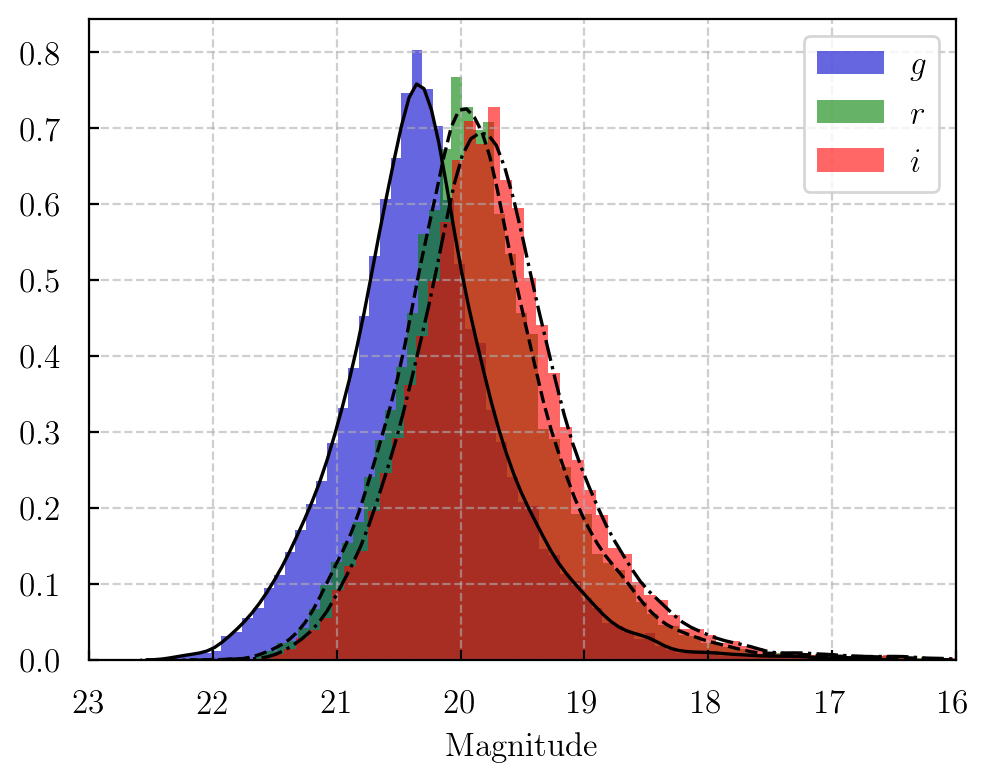

In [6]:
# Kalculate the KDE distriibutions
kde_g =gaussian_kde(mag_g)
kde_r =gaussian_kde(mag_r)
kde_i =gaussian_kde(mag_i)
x_g = np.linspace(mag_g.min(),mag_g.max(),100)
x_r = np.linspace(mag_r.min(),mag_r.max(),100)
x_i = np.linspace(mag_i.min(),mag_i.max(),100)
dx_g=kde_g(x_g)
dx_r=kde_r(x_r)
dx_i=kde_i(x_i)

plt.figure(figsize=(5.,4))
plt.tick_params(axis='both', labelsize=12)

plt.hist(mag_g, bins=70, color='mediumblue', alpha=0.6,density=True, label='$g$')
plt.plot(x_g,dx_g, c='k',linewidth=1.2)
plt.hist(mag_r, bins=70, color='green', alpha=0.6,density=True, label='$r$')
plt.plot(x_r,dx_r, c='k',ls='--',linewidth=1.2)
plt.hist(mag_i, bins=70, color='red', alpha=0.6,density=True, label='$i$')
plt.plot(x_i,dx_i, c='k',ls='-.',linewidth=1.2)

plt.grid(ls='--', axis='both' ,alpha=0.6)


plt.legend(frameon=True, loc='upper right', fontsize=12)
plt.xlim(23,16)
plt.xlabel('Magnitude', fontsize=12)


plt.tight_layout()
plt.savefig('mag_plots.pdf', dpi=100)
plt.show()

### Distributions of the magnitudes of the LSBGs and 2MPZ (matches)

In [8]:
# Open and read the 2MPZ catalog
matched = fits.open('2mpz_y3_gold_match.fits')
#print(matched[1].header.keys)

ra_match = matched[1].data['RA']
dec_match = matched[1].data['DEC']
ext_mof = matched[1].data['EXTENDED_CLASS_MOF']
ext_coadd = matched[1].data['EXTENDED_CLASS_COADD']
g_mag_match  = matched[1].data['MAG_AUTO_G']
fluxrad_g_match  = matched[1].data['FLUX_RADIUS_G']
mean_surf = matched[1].data['MU_MEAN_MODEL_G']
z = matched[1].data['BPZ_ZMEAN_MOF']
ra_match = ra_match[(ext_mof!=0)&(ext_coadd!=0)&(z<0.15)&(z>0.0)]
dec_match = dec_match[(ext_mof!=0)&(ext_coadd!=0)&(z<0.15)&(z>0.0)]
g_mag_match = g_mag_match[(ext_mof!=0)&(ext_coadd!=0)&(z<0.15)&(z>0.0)]
fluxrad_g_match = 0.263*fluxrad_g_match[(ext_mof!=0)&(ext_coadd!=0)&(z<0.15)&(z>0.0)]
mean_surf = mean_surf[(ext_mof!=0)&(ext_coadd!=0)&(z<0.15)&(z>0.0)]
print(len(ra_match))
for i in range(len(ra_match)):
    if (ra_match[i] > 150.):
        ra_match[i] = ra_match[i]-360.

#plt.figure(figsize = (8,7))

#plt.scatter(ra_match, dec_match, color='red', s=0.01, alpha=0.5)
#plt.scatter(ra_mpz_in, dec_mpz_in, color='blue', s=0.01, alpha=0.5)
#plt.xlim(110,-70)
#plt.show()

54919


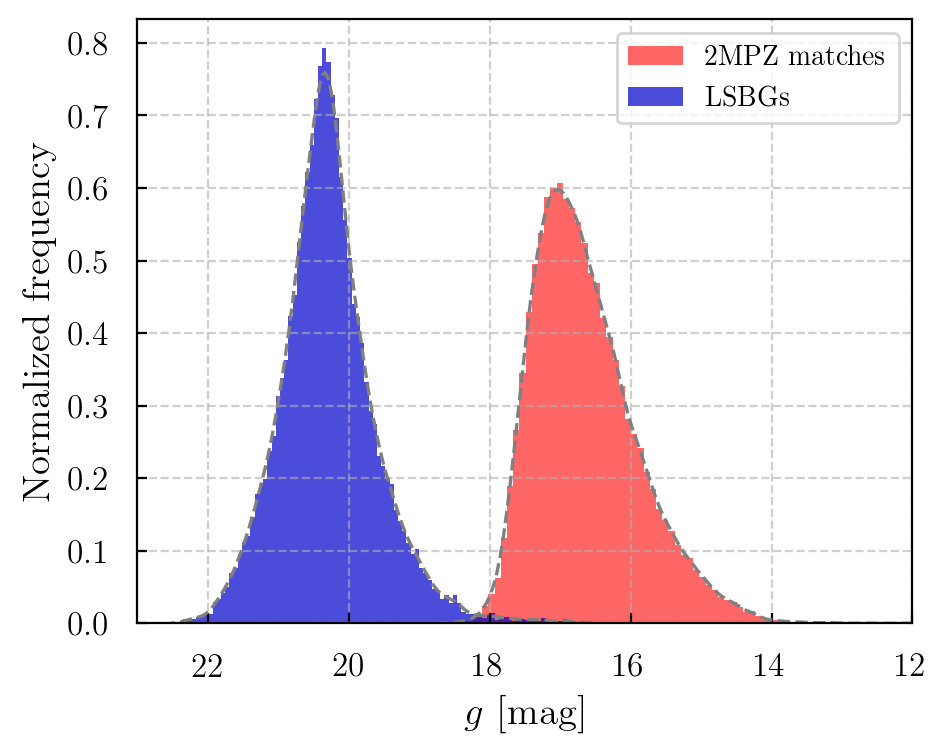

In [33]:
# Kalculate the KDE distriibutions
kde_g =gaussian_kde(mag_g)
kde_match =gaussian_kde(g_mag_match)

x_g = np.linspace(mag_g.min(),mag_g.max(),200)
x_match = np.linspace(g_mag_match.min(),g_mag_match.max(),200)
dx_g=kde_g(x_g)
dx_match=kde_match(x_match)


plt.figure(figsize = (5,4))
plt.tick_params(axis='both', labelsize=12)

plt.hist(g_mag_match[g_mag_match<20], bins=100,color='red',density=True, alpha=0.6, label='2MPZ matches')
plt.hist(mag_g, bins=100,color='mediumblue',density=True, alpha=0.7, label='LSBGs')

plt.plot(x_g,dx_g, c='gray',ls='--',linewidth=1.2)
plt.plot(x_match,dx_match,ls='--', c='gray',linewidth=1.2)

plt.xlim(23,12)

plt.grid(ls='--', axis='both' ,alpha=0.6)

plt.xlabel('$g$ [mag]', fontsize=14)
plt.ylabel('Normalized frequency', fontsize=14)
plt.legend(frameon=True, loc='upper right', fontsize=10)
plt.show()

### Size vs magnitude

In [29]:
# Magnitudes
mag_g_blue = mag_g[(col_g_i<med_g_i)]
mag_g_red = mag_g[(col_g_i>med_g_i)]
# Radii
eff_rad_blue = R_eff[(col_g_i<med_g_i)]
eff_rad_red = R_eff[(col_g_i>med_g_i)]

# Create a "dataset" compatible to the jointPlot function
data_1 = np.zeros((len(mag_g_blue),2))
data_1[:,0] = mag_g_blue;data_1[:,1] = eff_rad_blue
data_2 = np.zeros((len(mag_g_red),2))
data_2[:,0] = mag_g_red;data_2[:,1] = eff_rad_red

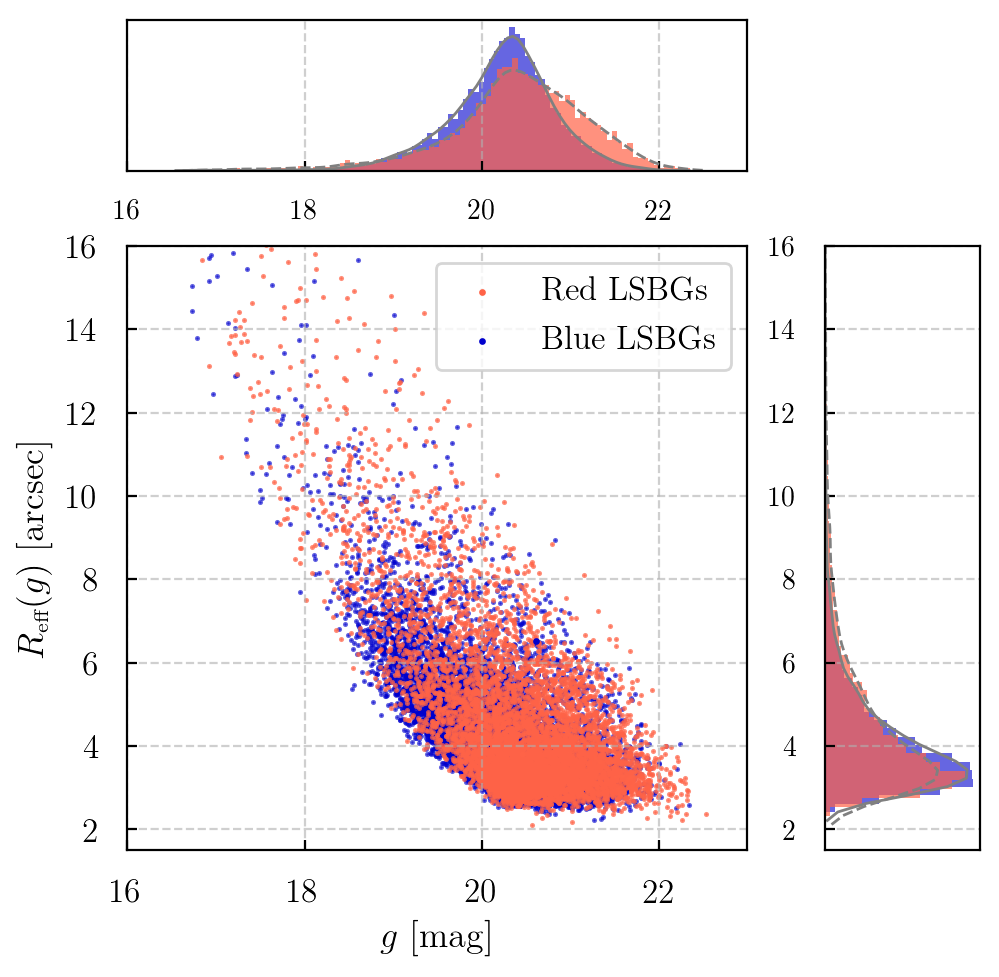

In [34]:
xlabel = '$g$ [mag]'
ylabel = '$R_{\mbox{\scriptsize{eff}}}(g)$ [arcsec]'
#ylabel = '$R_{\mbox{\scriptsize{eff}}}(g)$ [arcsec]'
ax,axt,axr = jointPlot(data_1,data_2, dims=4,cols=['mediumblue','tomato'],bins=100,kde=True
                       ,xlabel=xlabel, ylabel=ylabel, xlow=16,xup=23,ylow=1.5,yup=16)
#ax.vlines(24.3,1.5,16, color='k', linewidth=1.0,linestyle='--')
#ax.hlines(2.5,28,24, color='k', linewidth=1.0,linestyle='--')

axr.tick_params(axis='both', labelsize=10)
axt.tick_params(axis='both', labelsize=10)
ax.tick_params(axis='both', labelsize=12)
#ax.set_xticks([28,27,26,25,24])


ax.scatter(mag_g_red[0],eff_rad_red[0], s=2,color='tomato', label='Red LSBGs')
ax.scatter(mag_g_blue[100],eff_rad_blue[100],s=2, color='mediumblue', label='Blue LSBGs')

ax.legend(frameon=True, loc='upper right', fontsize=12)

plt.tight_layout()
plt.savefig('mag_size.png', dpi=100)
plt.show()

### Include the HSB sample

In [50]:
# Open and read the HSB galaxies catalog
HSB_gal = fits.open('HSB_3.fits')
# ===============================================================
# ===============================================================
#print HSB_gal[1].header.keys
ra_HSB = HSB_gal[1].data['RA']
dec_HSB = HSB_gal[1].data['DEC']
Z_MEAN_HSB = HSB_gal[1].data['BPZ_ZMEAN_MOF']
Z_MC_HSB = HSB_gal[1].data['BPZ_ZMC_MOF']
MU_MEAN_G_HSB = HSB_gal[1].data['MU_MEAN_MODEL_G']
mag_i_HSB = HSB_gal[1].data['MAG_AUTO_I']
mag_g_HSB = HSB_gal[1].data['MAG_AUTO_G']
col_g_i_HSB = mag_g_HSB - mag_i_HSB

for i in range(len(ra_HSB)):
    if (ra_HSB[i] > 150.):
        ra_HSB[i] = ra_HSB[i]-360.

In [51]:
diff = np.abs(Z_MEAN_HSB-Z_MC_HSB)
red_cut = (Z_MEAN_HSB>0.0)&(Z_MC_HSB>0.0)&(Z_MEAN_HSB<0.07)&(diff<0.2)

ra_HSB_new = ra_HSB[red_cut]
dec_HSB_new = dec_HSB[red_cut]
z_HSB_new = Z_MEAN_HSB[red_cut]
z_MC_new = Z_MC_HSB[red_cut]
mag_g_HSB_new = mag_g_HSB[red_cut]
mag_i_HSB_new = mag_i_HSB[red_cut] 
print(len(ra_HSB_new))

138416


In [64]:
mag_cut_n = (mag_g>18)&(mag_g<22)
y_like_g_LSB, x_like_g_LSB = np.histogram(mag_g[mag_cut_n], bins=100, density=False)  
y_like_g_HSB, x_like_g_HSB = np.histogram(mag_g_HSB_new, bins=100, density=False)
ratio = np.array(y_like_g_LSB, dtype=float)/np.array(y_like_g_HSB, dtype=float)
print(ratio)

[0.02385686 0.00779727 0.01976285 0.02231237 0.01538462 0.01503759
 0.02350814 0.02033898 0.01854975 0.02       0.04180064 0.04134763
 0.0464135  0.0295421  0.03551136 0.05571031 0.03439153 0.0436409
 0.04875    0.0420354  0.05136986 0.06140351 0.05735141 0.06711409
 0.06001936 0.07202993 0.07949413 0.07388316 0.08451883 0.07656613
 0.08320251 0.09899459 0.08357988 0.09714286 0.11080332 0.11827243
 0.09646495 0.09963986 0.12415902 0.11223345 0.12295082 0.14082278
 0.12559618 0.14458465 0.15522703 0.1866522  0.20532741 0.20070217
 0.23395321 0.26629766 0.2848723  0.32068063 0.33246922 0.38461538
 0.40254521 0.41367403 0.45130316 0.44701087 0.43658381 0.41917293
 0.39811321 0.39886578 0.34553089 0.32034884 0.30371204 0.28523112
 0.28084606 0.25952915 0.21634615 0.20407041 0.19672131 0.17795699
 0.16458446 0.14822547 0.15512465 0.13301537 0.11875637 0.11057948
 0.10265577 0.08775617 0.09799789 0.07434944 0.07612636 0.07368421
 0.0685155  0.05717427 0.05518395 0.05100287 0.04628571 0.04102

In [72]:
n_bins = len(y_like_g_LSB)
dx = x_like_g_LSB[1] - x_like_g_LSB[0]

ra_redist = []
dec_redist = []
mag_redist = []

for i in range(n_bins):
    # Upper and lower limits of the bins
    mag_low = x_like_g_LSB[i]
    mag_up = x_like_g_LSB[i+1]
    # ==================================
    # ==================================
    # Define here the magnitude cut for the prsent bin
    mag_cut = (mag_g_HSB_new>mag_low)&(mag_g_HSB_new<mag_up)
    
    
    
    mag_loc = mag_g_HSB_new[mag_cut]
    ra_loc = ra_HSB_new[mag_cut]
    dec_loc = dec_HSB_new[mag_cut]
    
    # ===================================================
    # Shuffle now
    N_loc = len(mag_loc)
    
    A_arr = np.arange(N_loc)
    
    np.random.shuffle(A_arr)
    mag_loc = mag_loc[A_arr]
    ra_loc = ra_loc[A_arr]
    dec_loc = dec_loc[A_arr]
    # ===================================================
    # ===================================================
    # Define size
    N_keep = 2*int(ratio[i]*N_loc)
    
    # Now keep only those from zero to N_keep
    mag_loc = mag_loc[0:N_keep]
    ra_loc = ra_loc[0:N_keep]
    dec_loc = dec_loc[0:N_keep]
    # ===================================================
    # ===================================================
    ra_redist = np.concatenate((ra_redist,ra_loc))
    dec_redist = np.concatenate((dec_redist,dec_loc))
    mag_redist = np.concatenate((mag_redist,mag_loc))
    

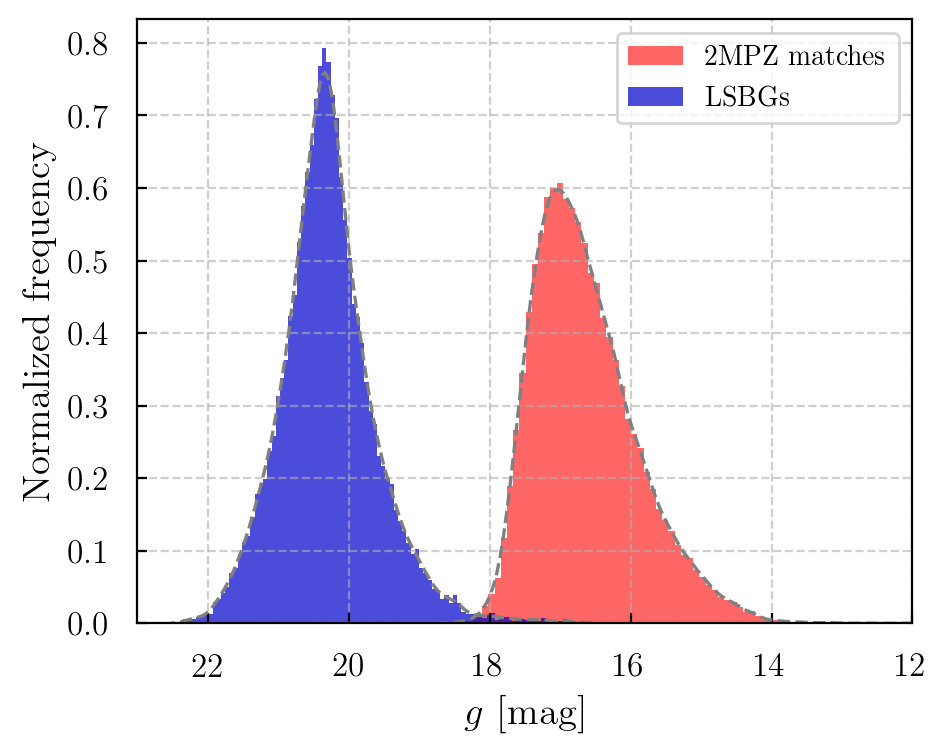

In [75]:
# Kalculate the KDE distriibutions
kde_g =gaussian_kde(mag_g)
kde_match =gaussian_kde(g_mag_match)

x_g = np.linspace(mag_g.min(),mag_g.max(),200)
x_match = np.linspace(g_mag_match.min(),g_mag_match.max(),200)
dx_g=kde_g(x_g)
dx_match=kde_match(x_match)


plt.figure(figsize = (5,4))
plt.tick_params(axis='both', labelsize=12)

plt.hist(g_mag_match[g_mag_match<20], bins=100,color='red',density=True, alpha=0.6, label='2MPZ matches')
#plt.hist(mag_redist,bins=100,density=True)
plt.hist(mag_g, bins=100,color='mediumblue',density=True, alpha=0.7, label='LSBGs')

plt.plot(x_g,dx_g, c='gray',ls='--',linewidth=1.2)
plt.plot(x_match,dx_match,ls='--', c='gray',linewidth=1.2)

plt.xlim(23,12)

plt.grid(ls='--', axis='both' ,alpha=0.6)

plt.xlabel('$g$ [mag]', fontsize=14)
plt.ylabel('Normalized frequency', fontsize=14)
plt.legend(frameon=True, loc='upper right', fontsize=10)
plt.show()

In [77]:
#Galfit_res = fits.open('Galfit_final_IDs.fits')
#Galfit_res[1].header.keys